In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Q1 we'll choose season 2016-2017

In [9]:
data_16_17 = pd.read_csv('ALL_DATA_TIDY/20162017_clean.csv')
df_shooter_16_17 = data_16_17.loc[~data_16_17['shooter'].isnull()]
df_shooter_nonNull_16_17 = df_shooter_16_17[~df_shooter_16_17['shootType'].isnull()]
shootType = df_shooter_nonNull_16_17['shootType'].unique()
eventType = df_shooter_16_17['eventTypeId'].unique()

In [10]:
shotNum_for_eachType = []
goalNum_for_eachType = []
goalRatio_for_eachType = []

for sType in shootType:
    shotNum = df_shooter_16_17.loc[df_shooter_16_17['shootType']==sType].shape[0]
    goalNum = df_shooter_16_17.loc[(df_shooter_16_17['shootType']==sType) & (df_shooter_16_17['eventTypeId']=='GOAL')].shape[0]
    shotNum_for_eachType.append(shotNum)
    goalNum_for_eachType.append(goalNum)
    goalRatio_for_eachType.append("{:.2f}".format((goalNum/shotNum)*100))

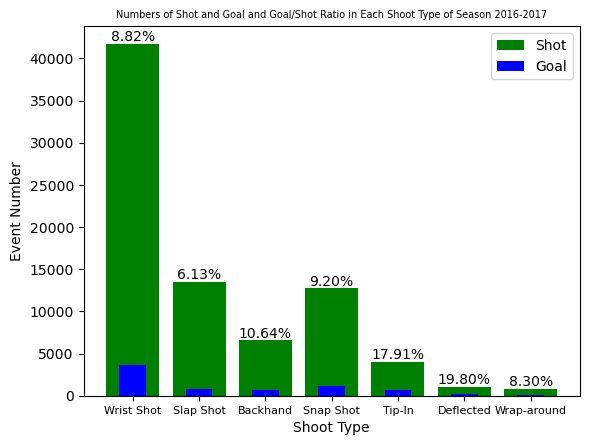

In [11]:
plt.bar(shootType, shotNum_for_eachType, width = 0.8, label="Shot", color='g')
plt.bar(shootType, goalNum_for_eachType, width = 0.4, label="Goal", color='b')
plt.plot()
plt.xticks(fontsize=8)
for i in range(len(shootType)):
    plt.text(shootType[i], shotNum_for_eachType[i], str(goalRatio_for_eachType[i])+'%', ha='center', va='bottom', fontsize=10)
plt.xlabel("Shoot Type")
plt.ylabel("Event Number")
plt.title("Numbers of Shot and Goal and Goal/Shot Ratio in Each Shoot Type of Season 2016-2017", size=7)
plt.legend()
plt.show()

In [12]:
## Q2

In [13]:
data_18_19 = pd.read_csv('ALL_DATA_TIDY/20182019_clean.csv')

In [14]:
df_shooter_18_19 = data_18_19.loc[~data_18_19['shooter'].isnull()]
df_shooter_nonNull_18_19 = df_shooter_18_19[(~df_shooter_18_19['shootType'].isnull()) & (~df_shooter_18_19['distance'].isnull())]

In [15]:
df_shooter_nonNull_nonShootOut_18_19 = df_shooter_nonNull_18_19.query("distance!='shoot out'")
df_shooter_nonNull_nonShootOut_goal_18_19 = df_shooter_nonNull_nonShootOut_18_19.query("eventTypeId=='GOAL'")

In [16]:
distances_18_19 = df_shooter_nonNull_nonShootOut_18_19.distance.astype(float)
bins_18_19 = [x for x in range(0,201,10)]
bin_centers_18_19 = [x for x in range(5,196,5)]
categories_18_19 = pd.cut(distances_18_19, bins=bins_18_19, right=False) 
bin_counts_18_19 = pd.Series(categories_18_19).value_counts().reset_index()
current_column_names_18_19 = bin_counts_18_19.columns
current_column_names_18_19.values[0] = 'interval'
current_column_names_18_19.values[1] = 'count'
bin_counts_18_19.columns = current_column_names_18_19

In [17]:
distances_goal_18_19 = df_shooter_nonNull_nonShootOut_goal_18_19.distance.astype(float)
bins_goal_18_19 = [x for x in range(0,201,10)]
bin_centers_goal_18_19 = [x for x in range(5,196,5)]
categories_goal_18_19 = pd.cut(distances_goal_18_19, bins=bins_goal_18_19, right=False) 
bin_counts_goal_18_19 = pd.Series(categories_goal_18_19).value_counts().reset_index()
current_column_names_goal_18_19 = bin_counts_goal_18_19.columns
current_column_names_goal_18_19.values[0] = 'interval'
current_column_names_goal_18_19.values[1] = 'count'
bin_counts_goal_18_19.columns = current_column_names_goal_18_19

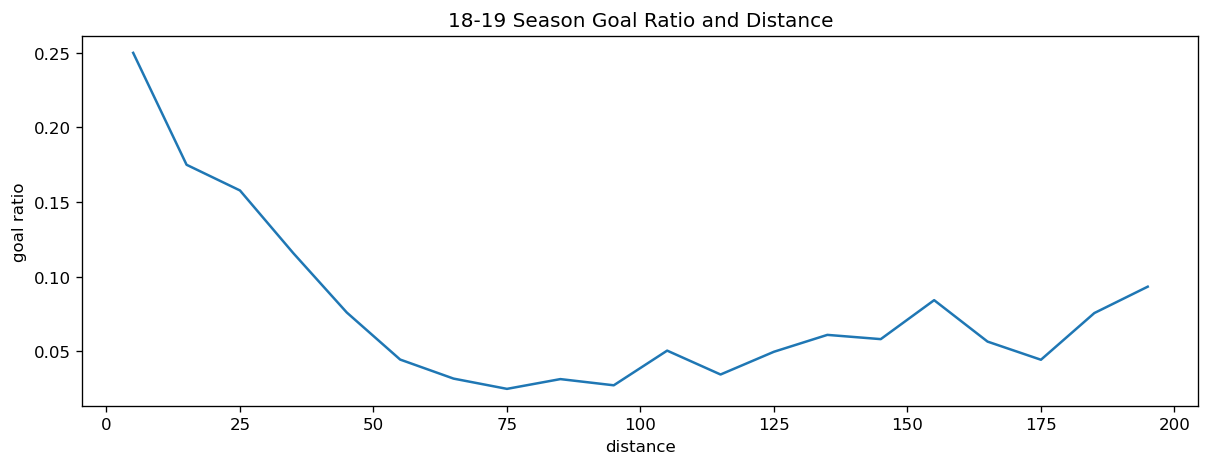

In [18]:
goal_ratio = []
intervals = []
bin_centers = []
for i in range(len(bin_counts_goal_18_19)):
    for j in range(len(bin_counts_18_19)):
        if bin_counts_goal_18_19.iloc[i].interval == bin_counts_18_19.iloc[j].interval:
            intervals.append(bin_counts_goal_18_19.iloc[i].interval)
            goal_ratio.append(bin_counts_goal_18_19.iloc[i]["count"]/bin_counts_18_19.iloc[j]["count"])
            bin_centers.append((bin_counts_goal_18_19.iloc[i].interval.left+bin_counts_goal_18_19.iloc[i].interval.right)//2)
            break
df_goal_ratio = pd.DataFrame({'interval': intervals, 'goal ratio': goal_ratio, 'distance': bin_centers})
fig, ax = plt.subplots(figsize=(12, 4), dpi=120)
sns.lineplot(data=df_goal_ratio, x="distance", y="goal ratio")
plt.title("18-19 Season Goal Ratio and Distance")
plt.show()

In [19]:
data_19_20 = pd.read_csv('ALL_DATA_TIDY/20192020_clean.csv')

In [20]:
df_shooter_19_20 = data_19_20.loc[~data_19_20['shooter'].isnull()]
df_shooter_nonNull_19_20 = df_shooter_19_20[(~df_shooter_19_20['shootType'].isnull()) & (~df_shooter_19_20['distance'].isnull())]

In [21]:
df_shooter_nonNull_nonShootOut_19_20 = df_shooter_nonNull_19_20.query("distance!='shoot out'")
df_shooter_nonNull_nonShootOut_goal_19_20 = df_shooter_nonNull_nonShootOut_19_20.query("eventTypeId=='GOAL'")

In [22]:
distances_19_20 = df_shooter_nonNull_nonShootOut_19_20.distance.astype(float)
bins_19_20 = [x for x in range(0,201,10)]
bin_centers_19_20 = [x for x in range(5,196,5)]
categories_19_20 = pd.cut(distances_19_20, bins=bins_19_20, right=False) 
bin_counts_19_20 = pd.Series(categories_19_20).value_counts().reset_index()
current_column_names_19_20 = bin_counts_19_20.columns
current_column_names_19_20.values[0] = 'interval'
current_column_names_19_20.values[1] = 'count'
bin_counts_19_20.columns = current_column_names_19_20

In [23]:
distances_goal_19_20 = df_shooter_nonNull_nonShootOut_goal_19_20.distance.astype(float)
bins_goal_19_20 = [x for x in range(0,201,10)]
bin_centers_goal_19_20 = [x for x in range(5,196,5)]
categories_goal_19_20 = pd.cut(distances_goal_19_20, bins=bins_goal_19_20, right=False) 
bin_counts_goal_19_20 = pd.Series(categories_goal_19_20).value_counts().reset_index()
current_column_names_goal_19_20 = bin_counts_goal_19_20.columns
current_column_names_goal_19_20.values[0] = 'interval'
current_column_names_goal_19_20.values[1] = 'count'
bin_counts_goal_19_20.columns = current_column_names_goal_19_20

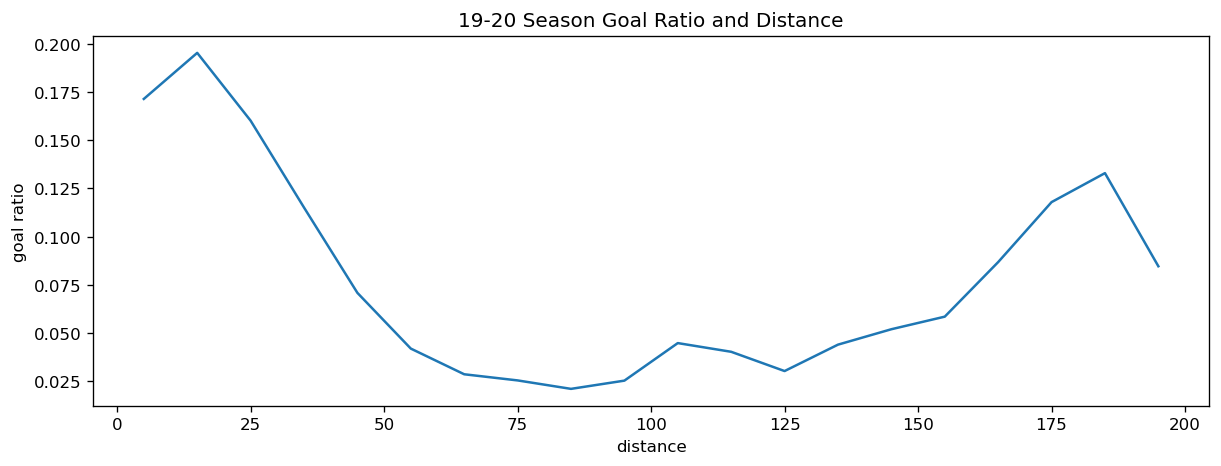

In [24]:
goal_ratio = []
intervals = []
bin_centers = []
for i in range(len(bin_counts_goal_19_20)):
    for j in range(len(bin_counts_19_20)):
        if bin_counts_goal_19_20.iloc[i].interval == bin_counts_19_20.iloc[j].interval:
            intervals.append(bin_counts_goal_19_20.iloc[i].interval)
            goal_ratio.append(bin_counts_goal_19_20.iloc[i]["count"]/bin_counts_19_20.iloc[j]["count"])
            bin_centers.append((bin_counts_goal_19_20.iloc[i].interval.left+bin_counts_goal_19_20.iloc[i].interval.right)//2)
            break
df_goal_ratio = pd.DataFrame({'interval': intervals, 'goal ratio': goal_ratio, 'distance': bin_centers})
fig, ax = plt.subplots(figsize=(12, 4), dpi=120)
sns.lineplot(data=df_goal_ratio, x="distance", y="goal ratio")
plt.title("19-20 Season Goal Ratio and Distance")
plt.show()

In [25]:
data_20_21 = pd.read_csv('ALL_DATA_TIDY/20202021_clean.csv')

/var/folders/l6/bdpfj8c928vfm_9q6gky77c40000gn/T/ipykernel_35000/1847034098.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  data_20_21 = pd.read_csv('ALL_DATA_TIDY/20202021_clean.csv')


In [26]:
df_shooter_20_21 = data_20_21.loc[~data_20_21['shooter'].isnull()]
df_shooter_nonNull_20_21 = df_shooter_20_21[(~df_shooter_20_21['shootType'].isnull()) & (~df_shooter_20_21['distance'].isnull())]

In [27]:
df_shooter_nonNull_nonShootOut_20_21 = df_shooter_nonNull_20_21.query("distance!='shoot out'")
df_shooter_nonNull_nonShootOut_goal_20_21 = df_shooter_nonNull_nonShootOut_20_21.query("eventTypeId=='GOAL'")

In [28]:
distances_20_21 = df_shooter_nonNull_nonShootOut_20_21.distance.astype(float)
bins_20_21 = [x for x in range(0,201,10)]
bin_centers_20_21 = [x for x in range(5,196,5)]
categories_20_21 = pd.cut(distances_20_21, bins=bins_20_21, right=False) 
bin_counts_20_21 = pd.Series(categories_20_21).value_counts().reset_index()
current_column_names_20_21 = bin_counts_20_21.columns
current_column_names_20_21.values[0] = 'interval'
current_column_names_20_21.values[1] = 'count'
bin_counts_20_21.columns = current_column_names_20_21

In [29]:
distances_goal_20_21 = df_shooter_nonNull_nonShootOut_goal_20_21.distance.astype(float)
bins_goal_20_21 = [x for x in range(0,201,10)]
bin_centers_goal_20_21 = [x for x in range(5,196,5)]
categories_goal_20_21 = pd.cut(distances_goal_20_21, bins=bins_goal_20_21, right=False) 
bin_counts_goal_20_21 = pd.Series(categories_goal_20_21).value_counts().reset_index()
current_column_names_goal_20_21 = bin_counts_goal_20_21.columns
current_column_names_goal_20_21.values[0] = 'interval'
current_column_names_goal_20_21.values[1] = 'count'
bin_counts_goal_20_21.columns = current_column_names_goal_20_21

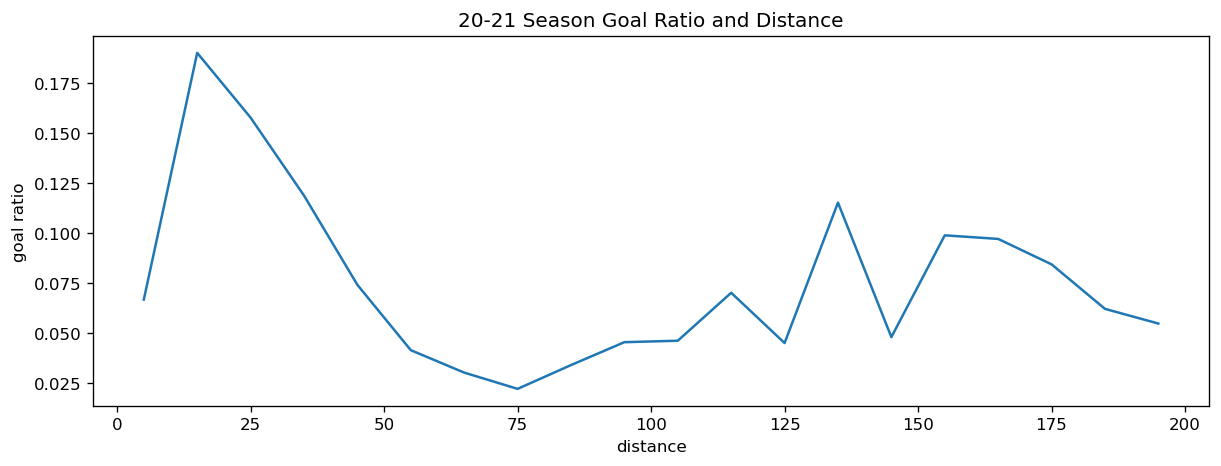

In [30]:
goal_ratio = []
intervals = []
bin_centers = []
for i in range(len(bin_counts_goal_20_21)):
    for j in range(len(bin_counts_20_21)):
        if bin_counts_goal_20_21.iloc[i].interval == bin_counts_20_21.iloc[j].interval:
            intervals.append(bin_counts_goal_20_21.iloc[i].interval)
            goal_ratio.append(bin_counts_goal_20_21.iloc[i]["count"]/bin_counts_20_21.iloc[j]["count"])
            bin_centers.append((bin_counts_goal_20_21.iloc[i].interval.left+bin_counts_goal_20_21.iloc[i].interval.right)//2)
            break
df_goal_ratio = pd.DataFrame({'interval': intervals, 'goal ratio': goal_ratio, 'distance': bin_centers})
fig, ax = plt.subplots(figsize=(12, 4), dpi=120)
sns.lineplot(data=df_goal_ratio, x="distance", y="goal ratio")
plt.title("20-21 Season Goal Ratio and Distance")
plt.show()

In [31]:
## Q3 we'll choose the season 2016-2017

In [33]:
df_valide = df_shooter_nonNull_20_21.query("distance!='shoot out'")
data_plot = df_valide [ ['eventTypeId','shootType'] ].reset_index()
bins = [x for x in range(0, 210, 10)]
bin_centers = [x for x in range(5, 205, 10)]
categories_goal = pd.cut(df_valide['distance'].astype(float), bins=bins, labels=bin_centers, right=False)
data_plot['distance_bins'] = categories_goal.values

In [34]:
df_plot = data_plot.groupby(['eventTypeId','shootType','distance_bins']).count()
df_plot = df_plot.reset_index()
df_plot = df_plot.rename(columns={'eventTypeId': 'eventTypeId',
                                  'shootType': 'shootType',
                                  'distance_bins': 'distance_bins',
                                  'index': 'sum'})

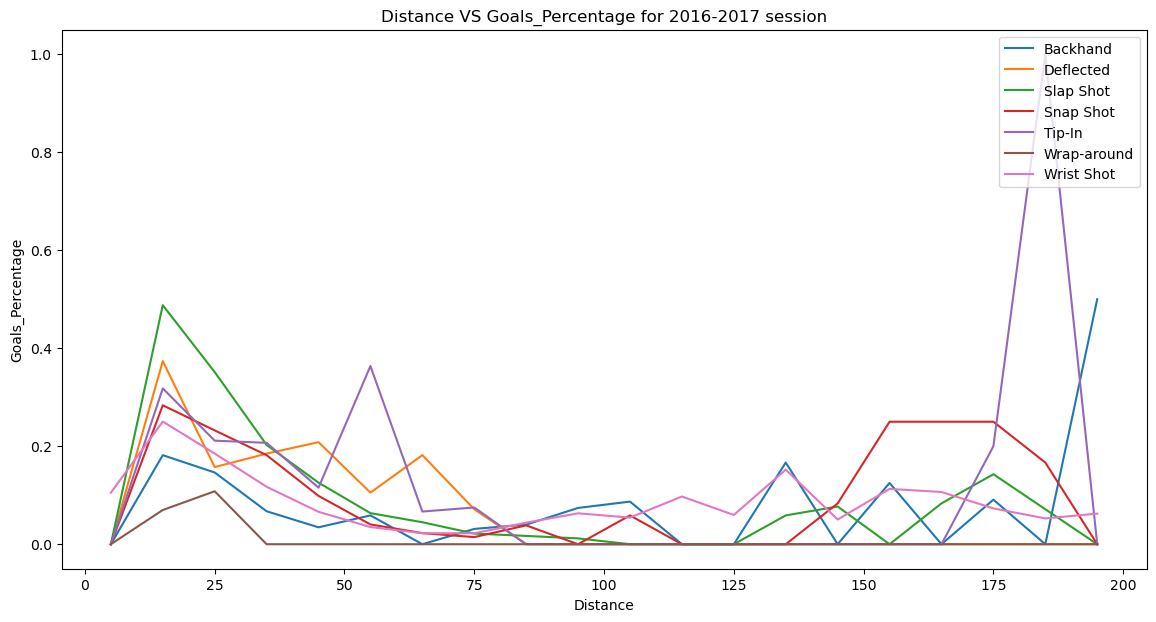

In [36]:
fig = plt.figure(figsize = (14,7))
for shotType in df_plot['shootType'].unique():
    ratio = []
    df_shotType = df_plot[df_plot['shootType'] == shotType]
    shot = df_shotType[df_shotType['eventTypeId'] == 'SHOT']
    goal = df_shotType[df_shotType['eventTypeId'] == 'GOAL']

    for i in range(len(shot)):
        if shot['sum'].iloc[i] != 0:
            ratio.append(goal['sum'].iloc[i]/shot['sum'].iloc[i])
        else:
            if goal['sum'].iloc[i] == 0:
                ratio.append(0)
            else:
                ratio.append(1)
    plt.plot(bin_centers,ratio,label = shotType)


plt.legend(loc='upper right')
plt.title('Distance VS Goals_Percentage for 2016-2017 session')
plt.xlabel('Distance')
plt.ylabel('Goals_Percentage')
plt.show()